In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [4]:
from sklearn import datasets
iris=datasets.load_iris()

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
iris.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [12]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

###### creating dataframe of given iris dataset.

In [13]:
df=pd.DataFrame({'sepal length':iris.data[:,0],
                'sepal width':iris.data[:,1],
                'petal length':iris.data[:,2],
                'petal width':iris.data[:,3],
                'species':iris.target})

In [14]:
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
df.shape

(150, 5)

In [17]:
a=df.corr()

In [19]:
a

,sepal length,sepal width,petal length,petal width,species
sepal length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal width,0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


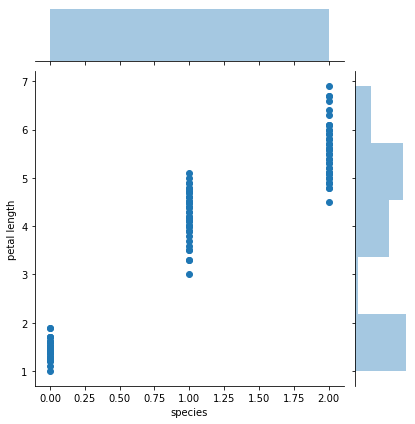

In [20]:
sns.jointplot(x='species',y='petal length',data=df)

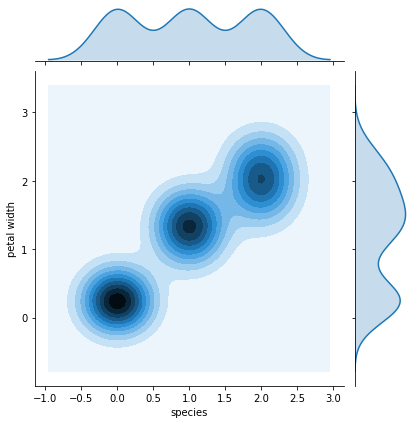

In [30]:
sns.jointplot(x='species',y='petal width',data=df,kind='kde')

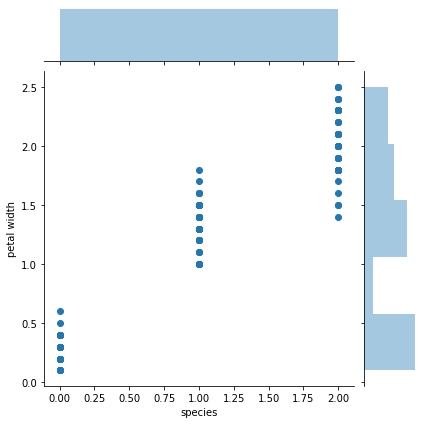

In [31]:
sns.jointplot(x='species',y='petal width',data=df)

C:\Users\Pawas\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Pawas\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


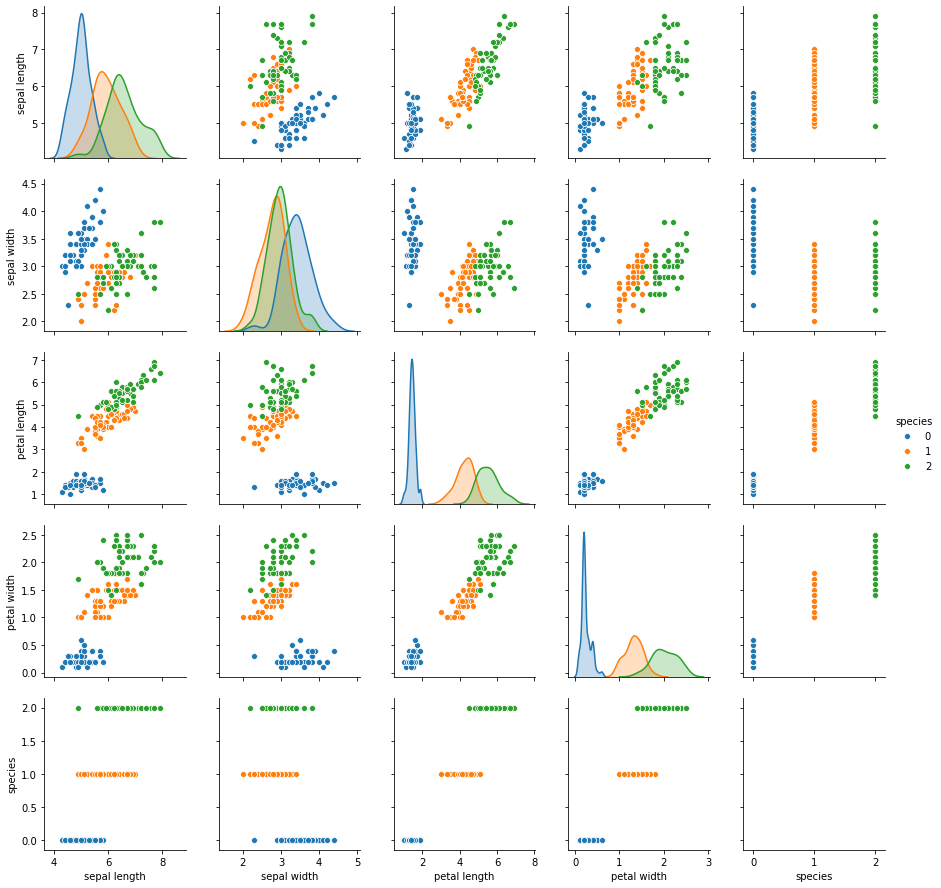

In [33]:
sns.pairplot(df,hue='species')

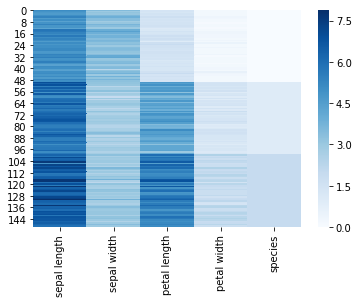

In [58]:
sns.heatmap(df,cmap="Blues")

Features and Labels

In [42]:
x=df.drop("species",axis=1)

In [43]:
y=df['species']

train_test_split

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

Train the model on the training dataset

In [49]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

perform prediction on the test set:

In [50]:
y_pred=clf.predict(x_test)

### accuracy score,confusion matrix and classfication report 

In [54]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [60]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0, 12,  0],
       [ 0,  1,  7]], dtype=int64)

In [61]:
accuracy_score(y_test,y_pred)

0.9666666666666667

In [62]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       0.92      1.00      0.96        12\n           2       1.00      0.88      0.93         8\n\n    accuracy                           0.97        30\n   macro avg       0.97      0.96      0.96        30\nweighted avg       0.97      0.97      0.97        30\n'

In [63]:
clf.predict([[3,5,4,2]])

array([2])

here 2 indicates the flower is verginica

### Finding/Selecting important Features in Iris dataset:
Here, we are finding important features or selecting features in the IRIS dataset. In scikit-learn, we can perform this task in the following steps:

First, you need to create a random forests model.

Second, use the feature importance variable to see feature importance scores.

Third, visualize these scores using the seaborn library.

In [66]:
feature_imp=pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)

In [67]:
feature_imp

petal width (cm)     0.454854
petal length (cm)    0.405418
sepal length (cm)    0.111180
sepal width (cm)     0.028547
dtype: float64

No handles with labels found to put in legend.


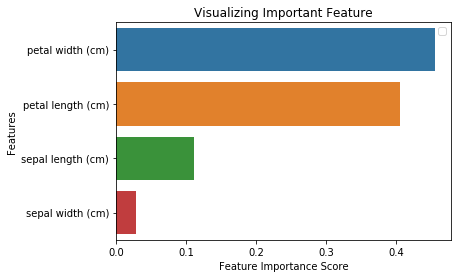

In [69]:
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Feature")
plt.legend()
plt.show()

### Generating the Model on Selected Features:
Here, you can remove the "sepal width" feature because it has very low importance, and select the 3 remaining features:

In [70]:
x=df[['petal length','petal width','sepal length']]
y=df[['species']]

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

C:\Users\Pawas\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [77]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [78]:
confusion_matrix(y_test,y_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]], dtype=int64)

In [79]:
accuracy_score(y_test,y_pred)

0.9666666666666667

In [80]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        11\n           1       0.93      1.00      0.96        13\n           2       1.00      0.83      0.91         6\n\n    accuracy                           0.97        30\n   macro avg       0.98      0.94      0.96        30\nweighted avg       0.97      0.97      0.97        30\n'

You can see that after removing the least important features (sepal length), the accuracy increased. This is because we removed misleading data and noise, resulting in an increased accuracy